# Find path to reach Google

## Case study description

Have you ever use a professional social network such as LinkedIn? Maybe you have just subscribed (if not, do it right now!) but not really thought about how to use it.

This guided activity is an opportunity to understand how you can use LinkedIn and why LinkedIn is a success... and makes money!

To start, ask yourself these questions:

- How would you use LinkedIn to get information about a company before applying for a position?
- How can a recruiter use LinkedIn to search for a particular talent?

Did you exploit the underlying social graph to answer the previous questions? If not, we invite you to play the Kevin Bacon Game. Try also http://socilab.com/ to see your own LinkedIn ego network.

Your aim is to sign a fulltime job contract with Google. What strategy would you develop? Who could help and "place" you in an open position? Who should you contact for this? To illustrate your strategies, let's say you are "U7989".

## Imports of modules
[NetworkX Documentation](https://networkx.github.io/documentation/stable/reference/index.html)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

## Import the data

Clone repository

In [ ]:
# Clone the repo containing the network data

!git clone -l -s https://github.com/mikeguzman1294/SocialNetworkAnalysis.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 6), reused 22 (delta 5), pack-reused 0
Unpacking objects: 100% (26/26), 1.00 MiB | 3.24 MiB/s, done.
[Errno 2] No such file or directory: 'cloned-repo/Datasets'
/content


In [ ]:
# Move to the relative path containing the data

%cd cloned-repo/challenge_0/
!ls

/content/cloned-repo/challenge_1
college_with_60percent_of_nodes_remoded.csv
employer_with_60percent_of_nodes_remoded.csv
empty.csv
groundtruth
location_with_60percent_of_nodes_remoded.csv
mediumLinkedin.gephi
mediumLinkedin.gexf
README.md
UserProfilingEgoNetworkIllinois.pdf


In [ ]:
# Load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("smallLinkedin.gexf")

# Exploratory analysis
Exploration of the graph : relational data understanding

In [ ]:
# networkx short summary of information for the graph g
#print(nx.info(G)) DEPRECATED
print(G)

Graph with 205 nodes and 287 edges


In [ ]:
G.number_of_nodes()

205

In [ ]:
G.number_of_edges()

287

## Degree


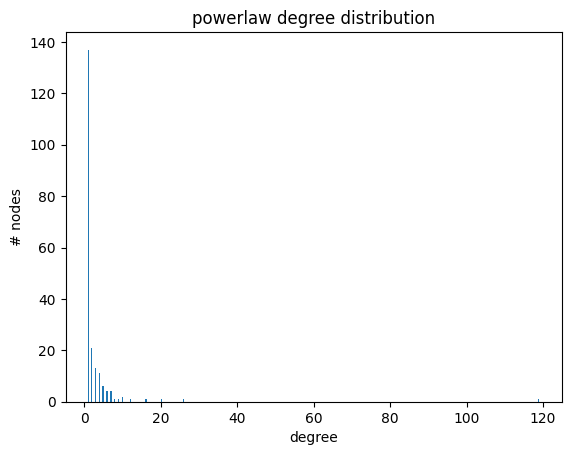

In [ ]:
# Draw the degree distribution. If powerlow distribution, the graph shows one of the properties
# of a real (complex) network, such as social networks, biological networks, internet networks.
plt.figure(num=None)
fig = plt.figure(1)
degree_sequence=[d for n, d in G.degree()] # degree sequence
plt.hist(degree_sequence, bins='auto')  
plt.title("powerlaw degree distribution")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.show()
pylab.close()
del fig

In [ ]:
G.degree()

DegreeView({'U15609': 1, 'U11824': 2, 'U8046': 2, 'U15689': 1, 'U21824': 1, 'U15715': 1, 'U15885': 1, 'U2124': 7, 'U2177': 12, 'U15528': 1, 'U2919': 3, 'U15773': 1, 'U15805': 1, 'U15820': 1, 'U15771': 1, 'U15567': 1, 'U10043': 1, 'U12475': 2, 'U2155': 9, 'U15554': 1, 'U15770': 1, 'U15458': 1, 'U14576': 1, 'U15459': 1, 'U15794': 1, 'U15748': 1, 'U15524': 1, 'U15889': 1, 'U21846': 3, 'U15568': 1, 'U15485': 1, 'U15796': 1, 'U7995': 119, 'U15529': 1, 'U21869': 1, 'U15581': 1, 'U15552': 1, 'U15499': 1, 'U12508': 3, 'U21847': 1, 'U2200': 1, 'U21822': 2, 'U2981': 3, 'U15838': 1, 'U14546': 2, 'U2937': 4, 'U15665': 1, 'U21859': 1, 'U14517': 1, 'U21954': 1, 'U7982': 7, 'U12490': 3, 'U15875': 1, 'U14560': 2, 'U14479': 2, 'U5977': 16, 'U15549': 1, 'U15841': 1, 'U8893': 1, 'U12503': 2, 'U15869': 1, 'U15810': 1, 'U15467': 1, 'U12465': 26, 'U21843': 1, 'U8003': 5, 'U12472': 5, 'U15687': 1, 'U12471': 2, 'U15468': 1, 'U15868': 1, 'U15873': 1, 'U15669': 1, 'U2992': 3, 'U15536': 1, 'U15681': 1, 'U15445':

In [ ]:
# To see the nodes with the highest degree
# We use "sorted" to sort a list
# We build the list of items (key + value) from NetworkX dictionary given by G.degree()
# The sort key is a lambda function which gives the indice of the data to sort.
# t is a tuple (key, value) from the dict
# Lambda says to sort with the value of the tuple: t[1], here the value form (key,value), i.e. d (the degree)
# to sort the tuple on the key, choose t[0]
sorted_nodes_by_degree=sorted([(n,d) for n, d in G.degree()], key=lambda t: t[1])
print("The 5 nodes with the highest degree are: %s" % str(sorted_nodes_by_degree[-5:]))
print("5 of the nodes with the smallest degree are: %s" % str(sorted_nodes_by_degree[:5]))

The 5 nodes with the highest degree are: [('U2177', 12), ('U5977', 16), ('U2102', 20), ('U12465', 26), ('U7995', 119)]
5 of the nodes with the smallest degree are: [('U15609', 1), ('U15689', 1), ('U21824', 1), ('U15715', 1), ('U15885', 1)]


## Neighbors

In [ ]:
me = "U7989"

In [ ]:
# To see the neighbors of a node
print("%s has %d neighbors" % (me, len([n for n in G.neighbors(me)])))
print("%s has %d neighbors" % (me, G.degree(me)))


U7989 has 4 neighbors
U7989 has 4 neighbors


In [ ]:
for n in G.neighbors(me):
    print(n)

U7995
U7982
U8018
U7976


In [ ]:
# Clustering coefficient, or local density
# "Friends of my friends are also my friends"
# For unweighted graphs, the clustering of a node u is 
# the fraction of possible triangles through that node that exist
# If u has 3 neighbors, and 2 of them are neighbors (friends), there is 1 triangle, and
# there are 3 possible triangles. The clustering coefficcient for u i 1/3 
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering
nx.clustering(G, me)

0.5

In [ ]:
# What about our 5 highest degree nodes?
nx.clustering(G, [n for n, d in sorted_nodes_by_degree[-5:]])
# The more the degree, the less the number of trinangles

{'U2177': 0.10606060606060606,
 'U5977': 0.06666666666666667,
 'U2102': 0.06842105263157895,
 'U12465': 0.06461538461538462,
 'U7995': 0.00128186867967526}

In [ ]:
# What about all the nodes?
print("Mean clustering coefficient %f" % np.mean(list(nx.clustering(G).values())))
# percentage of triangles among possible ones

Mean clustering coefficient 0.181355


In [ ]:
nx.average_clustering(G) # the same, the average is computed for you

0.18135453902092108

In [ ]:
# Global density
# Let's consider now all pairs of nodes, even non-neighbors
# How far from a complete graph are we?
# Guess the formula?
nx.density(G)

0.013725490196078431

## Paths, distances

##### Most real networks have very short paths on average. This is known as the small-world property. The popular notion that social networks have six degrees of separation originated from Milgram’s experiment.
In practice, social graphs have diameter less than 20. A social network like Facebook has a diameter that shrinks ; Facebook does not publish this information, but research studies estimate it 6.6 degrees of separation The Anatomy of the Facebook Social Graph http://arxiv.org/abs/1111.4503 or 4.74 Four Degrees of Separation http://arxiv.org/abs/1111.4570...

In [ ]:
# The diameter is the longest of the shortest path
nx.diameter(G)

11

Stop here a minute: what is the complexity of this operation in O(n), n number of nodes?

In [ ]:
# Eccentricity is, for a node, the longest shortest path from/to this node 
# NB we precompute the length of shortest paths here, because it costs! and we will use it several times
# For the small graph, you don't feel the computation time, but you'll see, in the Challenge 1 ;-)
precomputed_eccentricity=nx.eccentricity(G)
precomputed_eccentricity[me]

7

In [ ]:
sorted_nodes_by_max_distance=sorted([(n,d) for n, d in precomputed_eccentricity.items()], key=lambda t: t[1])
print("The 5 nodes with the longest shortest distance to others are: %s" % str(sorted_nodes_by_max_distance[-5:]))

The 5 nodes with the longest shortest distance to others are: [('U14555', 11), ('U3014', 11), ('U6024', 11), ('U14566', 11), ('U14548', 11)]


In [ ]:
# What about the closest nodes to others
sorted_nodes_by_max_distance[:150]

[('U21822', 6),
 ('U7982', 6),
 ('U15683', 6),
 ('U2102', 6),
 ('U11824', 7),
 ('U21824', 7),
 ('U2177', 7),
 ('U2155', 7),
 ('U21846', 7),
 ('U7995', 7),
 ('U21847', 7),
 ('U2200', 7),
 ('U21859', 7),
 ('U21843', 7),
 ('U8003', 7),
 ('U12471', 7),
 ('U21862', 7),
 ('U7989', 7),
 ('U21839', 7),
 ('U21831', 7),
 ('U21829', 7),
 ('U2112', 7),
 ('U10048', 7),
 ('U7983', 7),
 ('U2101', 7),
 ('U15609', 8),
 ('U8046', 8),
 ('U15689', 8),
 ('U15715', 8),
 ('U15885', 8),
 ('U2124', 8),
 ('U15528', 8),
 ('U15773', 8),
 ('U15805', 8),
 ('U15820', 8),
 ('U15771', 8),
 ('U15567', 8),
 ('U10043', 8),
 ('U15554', 8),
 ('U15770', 8),
 ('U15458', 8),
 ('U15459', 8),
 ('U15794', 8),
 ('U15748', 8),
 ('U15524', 8),
 ('U15889', 8),
 ('U15568', 8),
 ('U15485', 8),
 ('U15796', 8),
 ('U15529', 8),
 ('U21869', 8),
 ('U15581', 8),
 ('U15552', 8),
 ('U15499', 8),
 ('U15838', 8),
 ('U15665', 8),
 ('U21954', 8),
 ('U15875', 8),
 ('U15549', 8),
 ('U15841', 8),
 ('U8893', 8),
 ('U15869', 8),
 ('U15810', 8),
 ('U15

The minimum of the longest shortest path is 6. It is the radius of the graph
The center of the graph is composed of 4 nodes, the nodes with eccentricity equal to the radius

## Conclusion: Our LinkedIn graph is like a protein network!

Real networks have the same properties : 
* the small-world property (low diameter), 
* high average clustering coefficient 
* and power-law distribution of degree.



# How to reach Google guys?

In [ ]:
# We use pandas dataframes to load attributes
# Nodes are characterized by a list of colleges, a list of employers, a list of location
# The order means nothing. Nothing allow us to determine the current employer...
df = pd.read_csv('employer.csv', sep='\t', header='infer')
df.head()

,name,employer
0,U21881,lsst
1,U21881,ncsa
2,U21881,national center for supercomputing applications
3,U21881,grace community church champaign il
4,U8046,wolfram research


In [ ]:
df.groupby('name').count().describe()

,employer
count,92.000000
mean,2.663043
std,1.923122
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9.000000


* 92 users in this dataframe. Some nodes are not characterized by the attribute employer
* Median: 50% of users have more than 2 employers, 75% of them have 4 employers, and the max is 9!!!!

In [ ]:
df['employer'].value_counts()

google                                              6
university of illinois at urbana-champaign          6
texas a&amp;m university                            5
health alliance medical plans                       3
life on vine                                        2
                                                   ..
hl precision machining inc.                         1
mettler center; self-employed                       1
body evolve studios                                 1
elite foglia ymca lincolnshire tennis club et al    1
university inn                                      1
Name: employer, Length: 223, dtype: int64

In [ ]:
# Boolean row selection by values in a column
df.loc[df['employer'].isin(['google','google inc']),:].head()


,name,employer
15,U2177,google
61,U21869,google
131,U12465,google
144,U12471,google inc
148,U2992,google


In [ ]:
# How many nodes match google
len(df.loc[df['employer'].isin(['google','google inc']),:].drop_duplicates())

7

In [ ]:
google=df.loc[df['employer'].isin(['google','google inc']),'name'].values
google

array(['U2177', 'U21869', 'U12465', 'U12471', 'U2992', 'U12539', 'U2923'],
      dtype=object)

Yes!!! 7 (unique) users are working (or worked) for Google (or Google inc)! How canI  "use" them? Do I pick one of them randomly?

Maybe I should try to be introduced by friends? Or the friends of my friens? Let's use the Strength of Weak Ties!

## What about me? My name is U7989

In [ ]:
# I am node U7989
df[df.name == me]

,name,employer
241,U7989,prairie winds of urbana
242,U7989,wolfram research
243,U7989,news-gazette inc
244,U7989,university inn


Arghhh. No collegue to help me, but I still have friends !

In [ ]:
# How many neighbors?
G.degree(me)

4

In [ ]:
# Maybe, my neighbors know someone who work at Google and may recommend me to their boss?
i = 0
for nbr in G.neighbors(me):
    for nbr_nbr in G.neighbors(nbr):
        i+=1
        if nbr_nbr in google:
            print("My friend %s has a neighbor who works at Google: %s" % (nbr,nbr_nbr))
print("We have search %d users" % i)

We have search 132 users


## Let's use the weaker ties! And the shortest path: the shorter the path, the more concerned the Google employee who may get me pulled in

In [ ]:
p=5000
path = []
for n in google:
    pp=nx.shortest_path(G,me, n)
    if len(pp) < p :
        path=pp
        p=len(pp)
path

['U7989', 'U7982', 'U2102', 'U2177']

Not so bad! Just 3 intermediaries to ask for a recommendation!

## Other strategies?

Maybe, we could use a longer path, but with people sharing attributes, they might be more concerned!

What if someone in the path drops your CV? Maybe ensure resilience, i.e. choose nodes that, if removed, won't disconnect you from your targets. Centrality measures can help here.

To compare Strategies, you need a measure. What about the probality to reach targets when removing 1, 2, 3 nodes from the path?

# Drawing

In [ ]:
pos = nx.spring_layout(G, iterations=500)

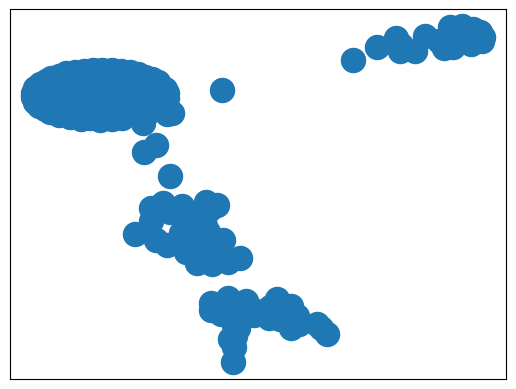

In [ ]:
nx.draw_networkx_nodes(G,pos)

In [ ]:
# 4 colors : me, google target U2177, other google employees and others
color_map={}
color_map[me] = 1.0
for n in google:
    if n=='U2177':
        color_map[n] = 0.6
    else:
        color_map[n] = 0.5
color_map[None]=0.0    

In [ ]:
# If else in list comprehensio
l = [22, 13, 45, 50, 98, 69, 43, 44, 1]
[x+1 if x >= 45 else x+5 for x in l]

[27, 18, 46, 51, 99, 70, 48, 49, 6]

In [ ]:
# generate the color values list in the correct order (iteration of nodes)
color_values = [color_map[node] if node in color_map else color_map[None] for node in G.nodes()]
size_values = [300 if (node=='U2177' or node==me) else 10 for node in G.nodes()]

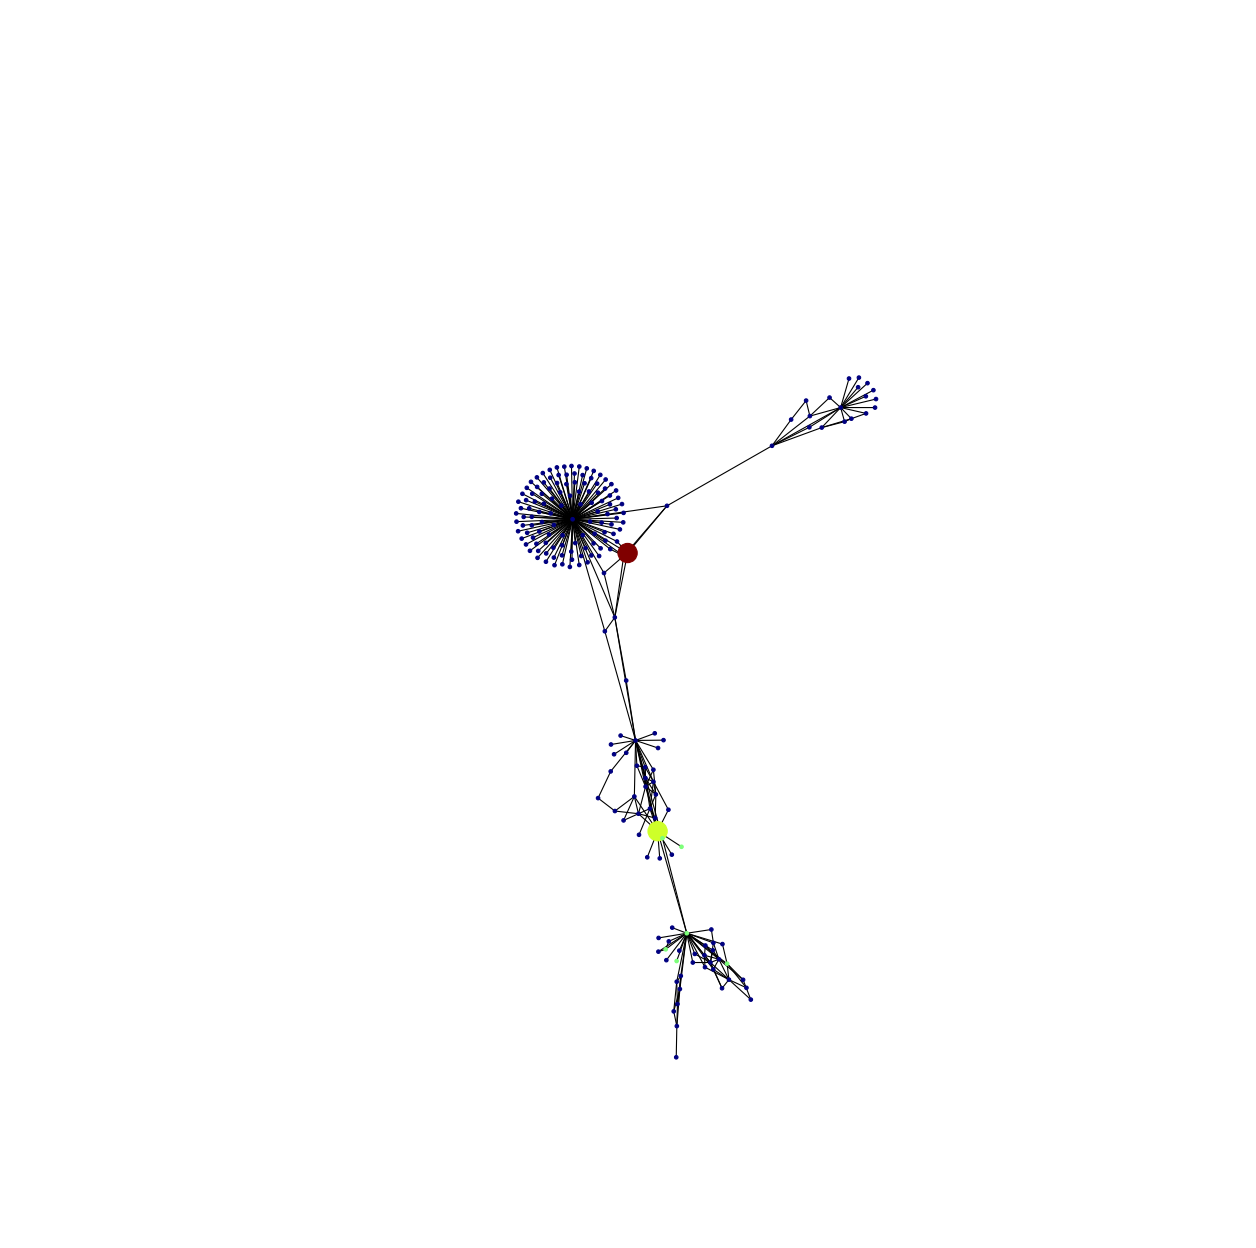

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pylab
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
nx.draw_networkx_nodes(G,pos, node_size=size_values, cmap=plt.get_cmap('jet'), node_color=color_values)
nx.draw_networkx_edges(G,pos)
cut = 2.5
xmax = cut * max(xx for xx, yy in pos.values())
ymax = cut * max(yy for xx, yy in pos.values())
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()
pylab.close()
del fig
